# Scalar and Vector Fields

## Scalar Fields

In physics, a scalar field associates a scalar value to every point in a space. The scalar may either be a mathematical number or a physical quantity. For example, the temperature at each point in a room is a scalar field: the temperature at each point can be represented by a single number. For example, the function $T(x,y,z)$ might represent the temperature in a room if $x$, $y$, and $z$ are the Cartesian coordinates of a point in the room. The scalar field value $T$ would be a single number at each point in space.  We could have something like:

$$ T(x,y,z) = 20 + 0.5e^{-x^2} + 0.5e^{-y^2} - 0.1z$$

Scalar fields are required to be coordinate-independent, meaning that any two observers using the same units will agree on the value of the scalar field at the same absolute point in space (or spacetime).
 
Other examples used in physics include the pressure distribution in a fluid, and spin-zero quantum fields, such as the Higgs field. These fields are the subject of scalar field theory.



## Visualizing Scalar Fields

A scalar field can be visualized as a contour plot or as a density plot. 

A contour plot uses lines to represent constant values of the scalar field. The idea here is that we choose a particular value of $one$ of the variables, and then plot the resulting function of the other two variables. This is a 2D plot, and the lines are called level curves.  So, for example, if we choose $z=0$, then we would plot the function $T(x,y,0)$, and the result would be a contour plot.


A density plot uses colors to represent the scalar field. 

The following code shows how to create several types of contour plots and then a density plot of the scalar field $T(x,y,z)$.

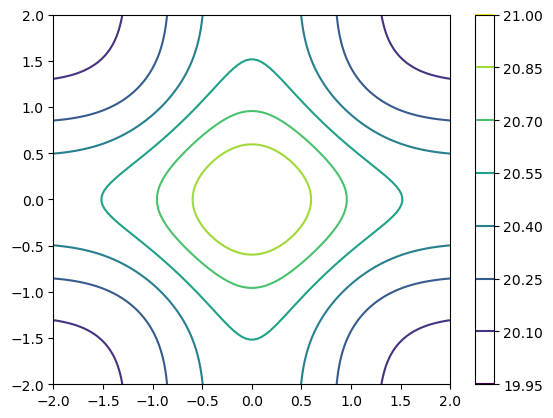

In [2]:
# Contour Plot - Level Curves

import numpy as np
import matplotlib.pyplot as plt

# Create a scalar field
def T(x,y,z):
    return 20 + 0.5*np.exp(-x**2) + 0.5*np.exp(-y**2) - 0.1*z

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

# Create a meshgrid
X,Y = np.meshgrid(x,y)

# Evaluate the scalar field at the grid points
TZ0 = T(X,Y,0)

# Create a contour plot
plt.contour(X,Y,TZ0)
plt.colorbar()
plt.show()

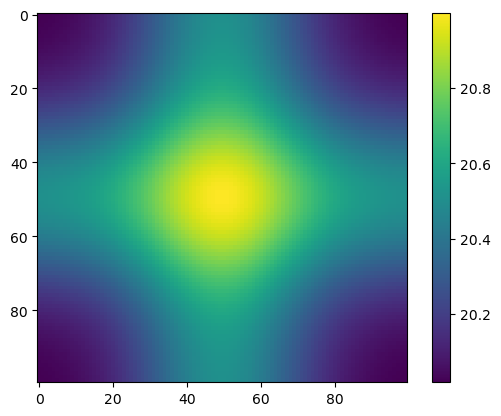

In [3]:
# Create a 2D color contour plot

plt.imshow(TZ0)
plt.colorbar()
plt.show()

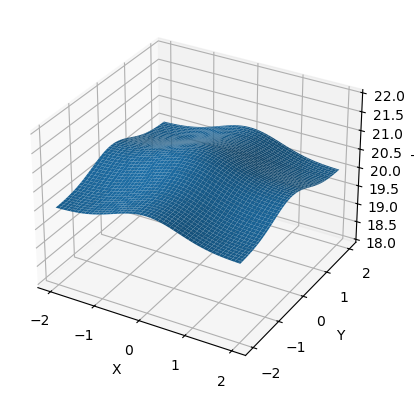

In [4]:
# Create a 3D surface plot
#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, TZ0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('T')
ax.set_zlim(18,22)
plt.show()

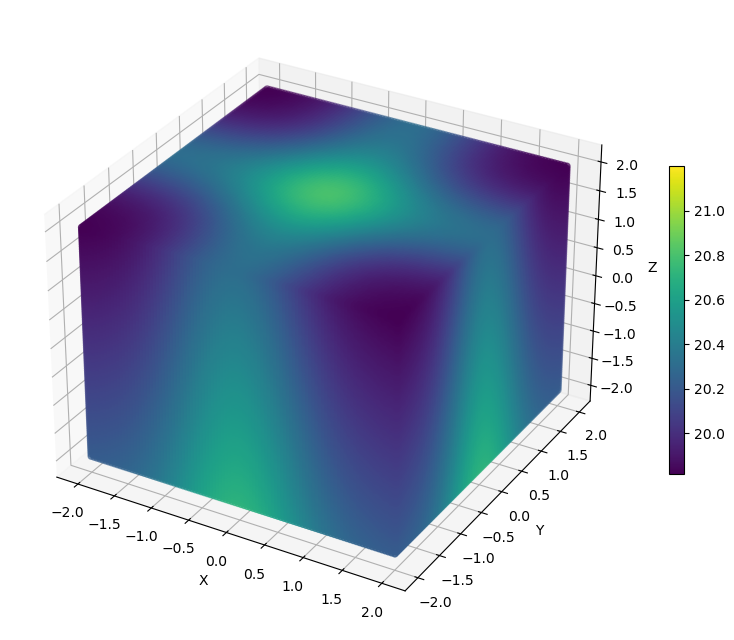

In [5]:
# Create a density plot of a scalar field in 3D

def T(x,y,z):
    return 20 + 0.5*np.exp(-x**2) + 0.5*np.exp(-y**2) - 0.1*z

# Create a grid of points in the x-y plane

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
z = np.linspace(-2,2,100)

# Create a meshgrid
X,Y,Z = np.meshgrid(x,y,z)

# Evaluate the scalar field at the grid points
TXYZ = T(X,Y,Z)

# Create a density plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
pcm = ax.scatter(X,Y,Z,c=TXYZ)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(pcm, ax=ax, shrink=0.4)
plt.show()

## Vector Fields

In vector calculus, a vector field is an assignment of a vector to each point in a subset of space. 

A vector field in the plane, can be visualized as: a collection of arrows with a given magnitude and direction, each attached to a point in the plane. 

Vector fields are often used to model, for example, the speed and direction of a moving fluid throughout space, or the strength and direction of some force, such as the magnetic or gravitational force, as it changes from one point to another point.

The elements of differential and integral calculus extend naturally to vector fields. When a vector field represents force, the line integral of a vector field represents the work done by a force moving along a path, and under this interpretation conservation of energy is exhibited as a special case of the fundamental theorem of calculus. 

Vector fields can usefully be thought of as representing the velocity of a moving flow in space, and this physical intuition leads to notions such as the divergence (which represents the rate of change of volume of a flow) and curl (which represents the rotation of a flow).

## Visualizing Vector Fields

A vector field can be visualized as a quiver plot. A quiver plot displays velocity vectors as arrows with components (u,v) at the points (x,y). The following code shows how to create a quiver plot of the vector field $V(x,y) = (x,y)$.

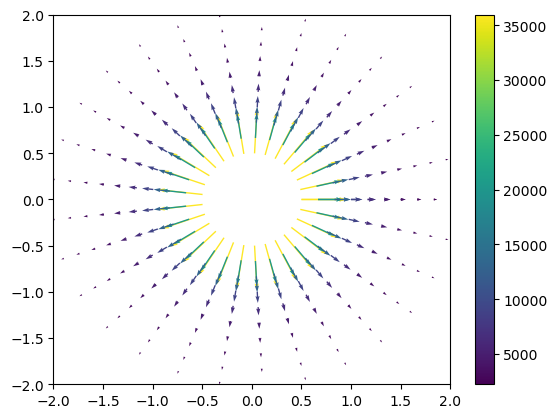

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a vector field
def V(x,y):
    k = 8.99E9
    q = 1E-6
    r = np.sqrt(x**2 + y**2)
    return (k*q*x/r**3, k*q*y/r**3)

# Create a grid of points in the x-y plane
r = np.linspace(0.5, 2.0, 10)
theta = np.linspace(0, 2*np.pi, 30)

# create 2D polar grid
R, Theta = np.meshgrid(r, theta)

# Convert to Cartesian coordinates
X = R*np.cos(Theta)
Y = R*np.sin(Theta)

# Evaluate the vector field at the grid points
U,V = V(X,Y)

# Calculate the magnitude of the vectors
M = np.sqrt(U**2 + V**2)

# Create a quiver plot
plt.quiver(X,Y,U,V,M)
plt.colorbar()
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

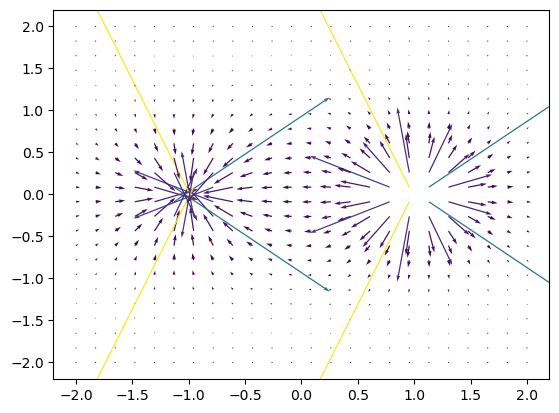

In [7]:
# Create a vector field for an electric dipole

def V(x,y):
    k = 8.99E9
    q1 = 1E-6
    q2 = -1E-6
    r1 = np.sqrt((x-1)**2 + y**2)
    r2 = np.sqrt((x+1)**2 + y**2)
    return (k*q1*(x-1)/r1**3 + k*q2*(x+1)/r2**3,k*q1*y/r1**3+k*q2*y/r2**3)

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,24)
y = np.linspace(-2,2,24)

# Create a meshgrid
X,Y = np.meshgrid(x,y)

# Evaluate the vector field at the grid points
U,V = V(X,Y)

# Calculate the magnitude of the vectors
M = np.sqrt(U**2 + V**2)

# Create a quiver plot
plt.quiver(X,Y,U,V,M)
plt.show()

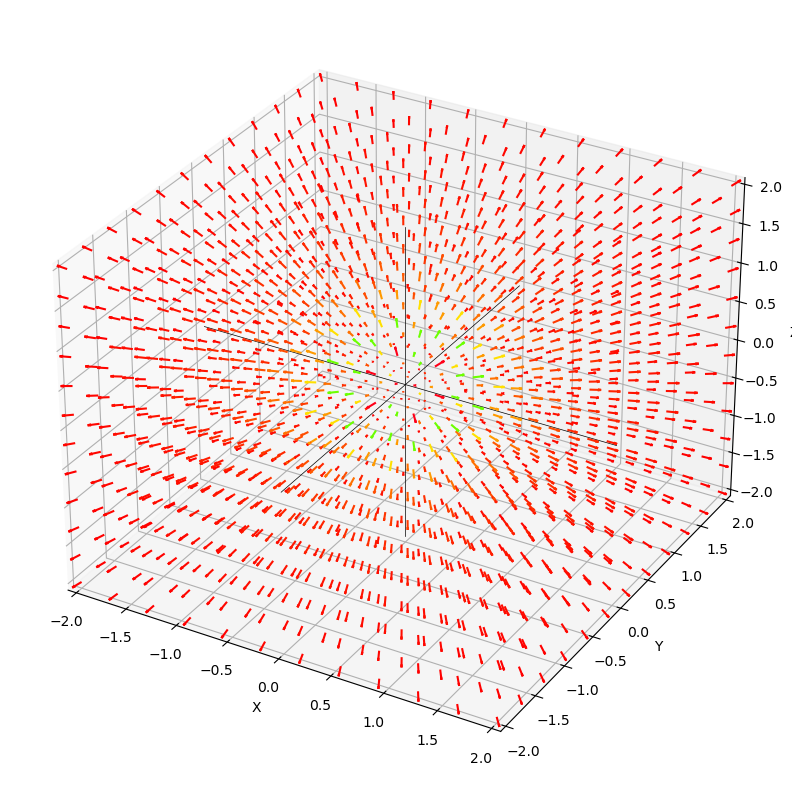

In [8]:
# Create a 3D vector field

def V(x,y,z):
    k = 8.99E9
    q = 1E-6
    r = np.sqrt(x**2 + y**2 + z**2)
    return (k*q*x/r**3, k*q*y/r**3, k*q*z/r**3)

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,12)
y = np.linspace(-2,2,12)
z = np.linspace(-2,2,12)

# Create a meshgrid
X,Y,Z = np.meshgrid(x,y,z)

# Evaluate the vector field at the grid points
U,V,W = V(X,Y,Z)

# Create a quiver plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Color by length of vector
c = np.sqrt(U**2 + V**2 + W**2)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)
    
ax.quiver(X, Y, Z, U, V, W, colors=c, length=0.1, normalize=True)
    
# Draw axes
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Draw lines at z=0, x=0, y=0
ax.plot([-2,2],[0,0],[0,0],color='k',lw=0.5)
ax.plot([0,0],[-2,2],[0,0],color='k',lw=0.5)
ax.plot([0,0],[0,0],[-2,2],color='k',lw=0.5)

plt.show()


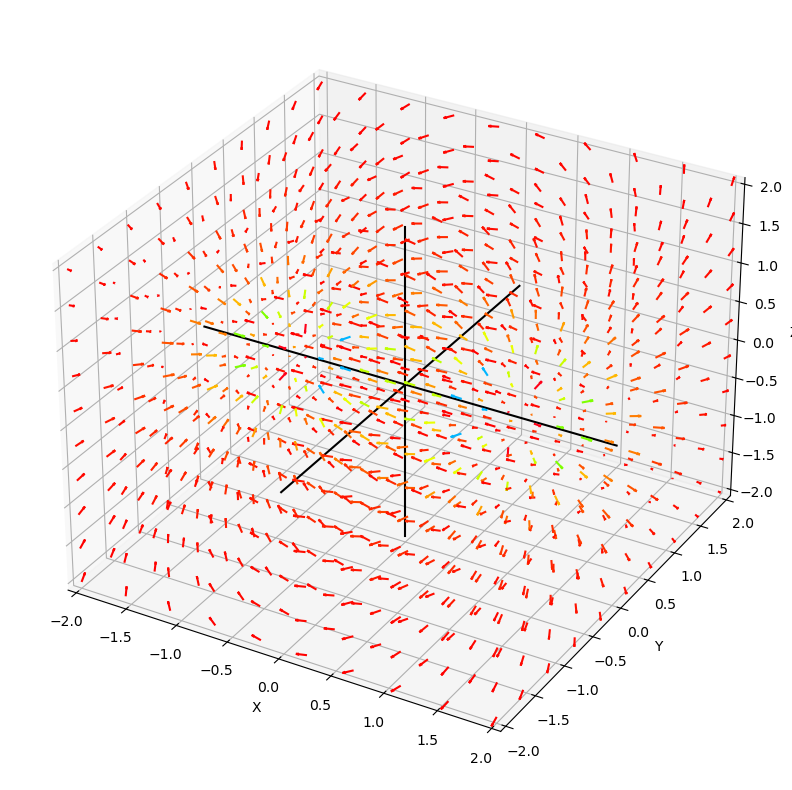

In [10]:
# Create a 3D vector field for an electric dipole

def V(x,y,z):
    k = 8.99E9
    q1 = 1E-6
    q2 = -1E-6
    r1 = np.sqrt((x-1)**2 + y**2 + z**2)
    r2 = np.sqrt((x+1)**2 + y**2 + z**2)
    return (k*q1*(x-1)/r1**3 + k*q2*(x+1)/r2**3, k*q1*y/r1**3 + k*q2*y/r2**3, k*q1*z/r1**3 + k*q2*z/r2**3)

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,10)
y = np.linspace(-2,2,10)
z = np.linspace(-2,2,10)

# Create a meshgrid
X,Y,Z = np.meshgrid(x,y,z)

# Evaluate the vector field at the grid points
U,V,W = V(X,Y,Z)

# Create a quiver plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Color by length of vector
c = np.sqrt(U**2 + V**2 + W**2)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)

ax.quiver(X, Y, Z, U, V, W, colors=c, length=0.1, normalize=True)

# Draw axes
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Draw lines at z=0, x=0, y=0
ax.plot([-2,2],[0,0],[0,0],color='k',lw=1.5)
ax.plot([0,0],[-2,2],[0,0],color='k',lw=1.5)
ax.plot([0,0],[0,0],[-2,2],color='k',lw=1.5)

plt.show()

## Curvature and Acceleration

The curvature of a curve measures how fast the unit tangent vector changes as we move along the curve. 

The acceleration of a particle moving along a curve is the rate of change of the velocity vector. The acceleration vector is tangent to the curve and points in the direction of increasing speed. 

Let's consider a case that we all know and love:  Projectile Motion

The position of a projectile at time $t$ is given by the vector $r(t) = (v_0t\cos(\theta), v_0t\sin(\theta) - \frac{1}{2}gt^2)$, where $v_0$ is the initial velocity, $\theta$ is the angle of launch, and $g$ is the acceleration due to gravity.

The following code shows how to create a plot of the curvature and acceleration vectors for the projectile motion.

## Initial conditions

$v_0 = 40$ m/s

$\theta = \pi/4$ radians

## Range of time

The range of a projectile is given by $R = \frac{v_0^2\sin(2\theta)}{g}$

The time of flight is given by $T = \frac{2v_0\sin(\theta)}{g}$


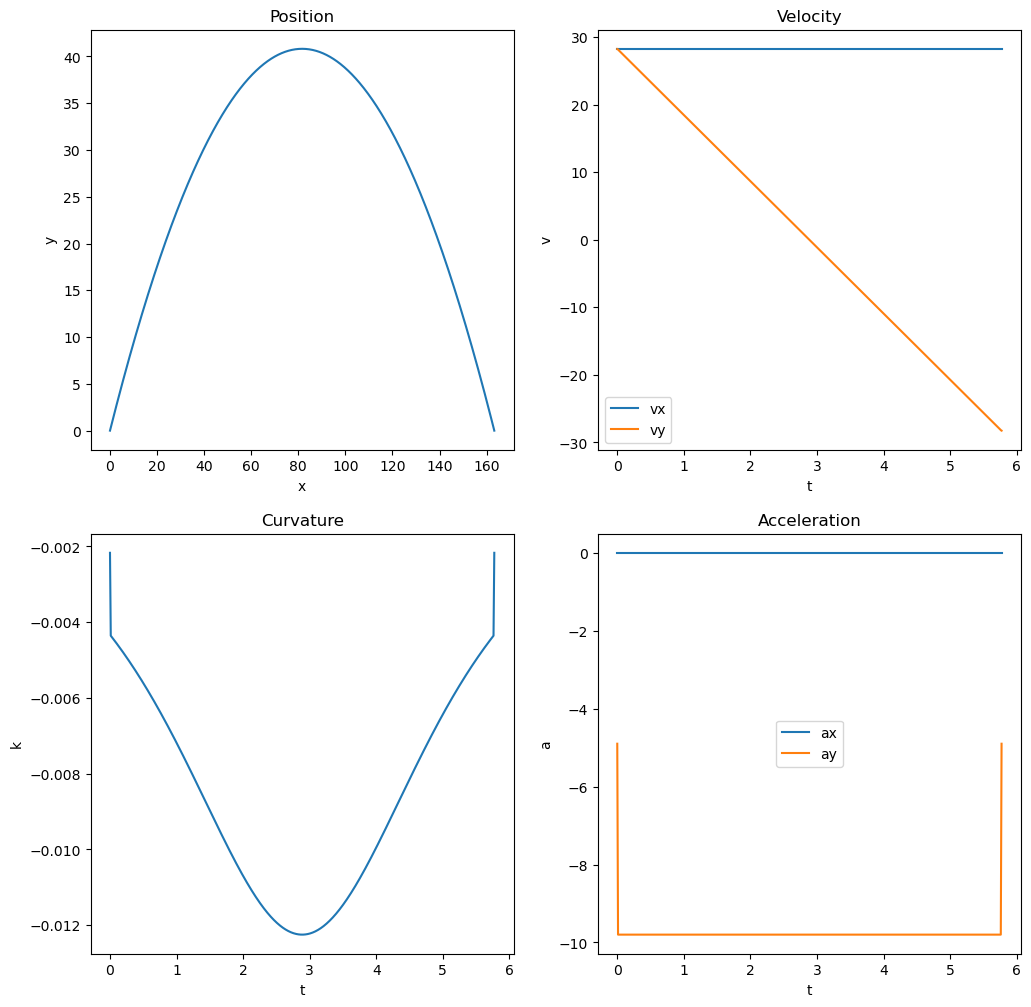

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v0 = 40
theta = np.pi/4
g = 9.8

t_max = 2*v0*np.sin(theta)/g

# Create a curve
def r(t):
    global v0, theta
    return (v0*t*np.cos(theta), v0*t*np.sin(theta) - 0.5*g*t**2)

# Create a grid of points in the t domain
t = np.linspace(0,t_max,1000)

# Evaluate the curve at the grid points
x,y = r(t)

# Create a plot of the curve
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0][0].plot(x,y)
ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('y')
ax[0][0].set_title('Position')

# Create a plot of the velocity and curvature
dxdt = np.gradient(x,t)
dydt = np.gradient(y,t)
d2xdt2 = np.gradient(dxdt,t)
d2ydt2 = np.gradient(dydt,t)
k = (dxdt*d2ydt2 - dydt*d2xdt2) / (dxdt**2 + dydt**2)**(3/2)
ax[0][1].plot(t,dxdt, label='vx')
ax[0][1].plot(t,dydt, label='vy')
ax[0][1].legend()
ax[0][1].set_xlabel('t')
ax[0][1].set_ylabel('v')
ax[0][1].set_title('Velocity')

ax[1][0].plot(t,k)
ax[1][0].set_xlabel('t')
ax[1][0].set_ylabel('k')
ax[1][0].set_title('Curvature')

# Create a plot of the acceleration
accx = np.gradient(dxdt,t)
accy = np.gradient(dydt,t)
ax[1][1].plot(t,accx, label='ax')
ax[1][1].plot(t,accy, label='ay')
ax[1][1].set_xlabel('t')
ax[1][1].set_ylabel('a')
ax[1][1].set_title('Acceleration')
ax[1][1].legend()

plt.show()
